In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
data= pd.read_csv(r"C:\Users\vidisha\Downloads\Iris.csv")

In [4]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data=data.drop(["Id"],axis=1)

In [7]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [15]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [17]:
data["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

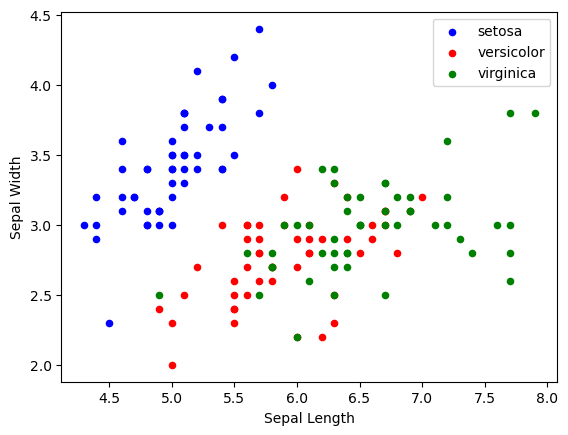

In [30]:
fig=data[data.Species=="Iris-setosa"].plot(x='SepalLengthCm', y='SepalWidthCm' , kind='scatter', color='blue', label='setosa')
data[data.Species=="Iris-versicolor"].plot(x='SepalLengthCm', y='SepalWidthCm' , kind='scatter', color='red', label='versicolor', ax=fig)
data[data.Species=="Iris-virginica"].plot(x='SepalLengthCm', y='SepalWidthCm' , kind='scatter', color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig=plt.gcf()
plt.show()


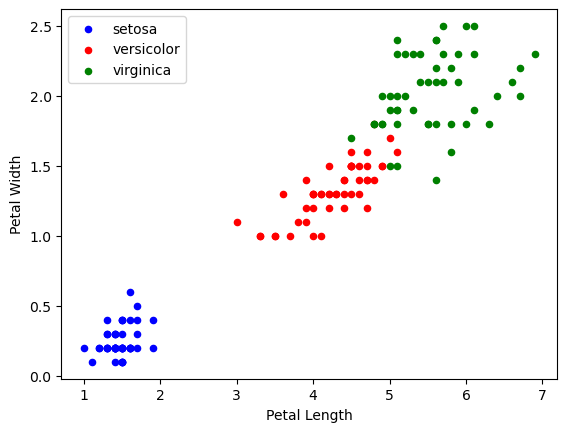

In [27]:
fig1=data[data.Species=="Iris-setosa"].plot(x='PetalLengthCm', y='PetalWidthCm' , kind='scatter', color='blue', label='setosa')
data[data.Species=="Iris-versicolor"].plot(x='PetalLengthCm', y='PetalWidthCm' , kind='scatter', color='red', label='versicolor', ax=fig1)
data[data.Species=="Iris-virginica"].plot(x='PetalLengthCm', y='PetalWidthCm' , kind='scatter', color='green', label='virginica', ax=fig1)
fig1.set_xlabel("Petal Length")
fig1.set_ylabel("Petal Width")
fig1=plt.gcf()
plt.show()

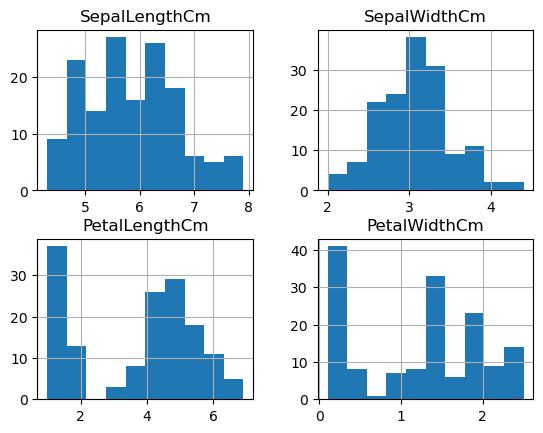

In [28]:
data.hist()
plt.show()

In [40]:
x= data.drop(['Species'], axis=1)
y=data['Species']

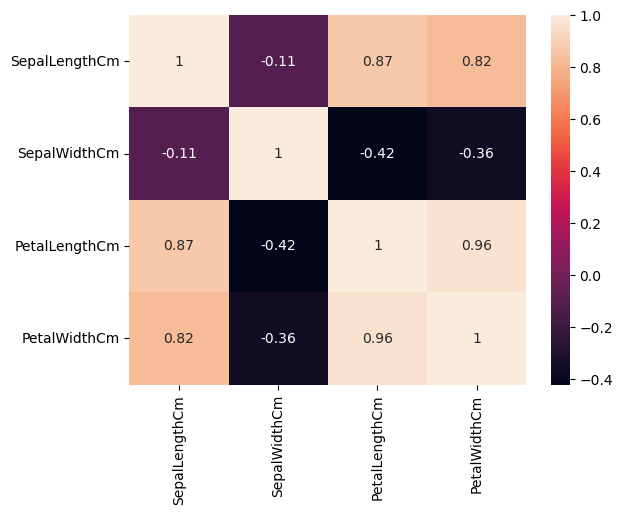

In [41]:
sns.heatmap(x.corr(), annot=True)
plt.show()

In [42]:
from sklearn.model_selection import train_test_split
xtrain, xtest , ytrain , ytest= train_test_split(x,y, test_size=.3)
print(xtrain.shape)
print(ytrain.shape)

(105, 4)
(105,)


In [47]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

In [53]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
acc = accuracy_score(ytest, ypred)
print("accuracy:", acc*100)
print(confusion_matrix(ytest, ypred))
print(classification_report(ytest, ypred))

accuracy: 100.0
[[13  0  0]
 [ 0 16  0]
 [ 0  0 16]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      1.00      1.00        16
 Iris-virginica       1.00      1.00      1.00        16

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [56]:
training_acc= model.score(xtrain,ytrain)*100
testing_acc= model.score(xtest, ypred)*100
print("training accuracy: " , training_acc)
print("testing accuracy: ",  testing_acc)

training accuracy:  96.19047619047619
testing accuracy:  100.0


In [59]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier()
model2.fit(xtrain,ytrain)
ypred2=model2.predict(xtest)

In [60]:
acc2 = accuracy_score(ytest, ypred2)
print("accuracy:", acc*100)
print(confusion_matrix(ytest, ypred2))
print(classification_report(ytest, ypred2))

accuracy: 100.0
[[13  0  0]
 [ 0 14  2]
 [ 0  3 13]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.82      0.88      0.85        16
 Iris-virginica       0.87      0.81      0.84        16

       accuracy                           0.89        45
      macro avg       0.90      0.90      0.90        45
   weighted avg       0.89      0.89      0.89        45

